In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 

In [4]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0
ctrl_minus4 = np.zeros((14,12,1015,1359))
ctrl_near0 = np.zeros((14,12,1015,1359))
ctrl_plus4 = np.zeros((14,12,1015,1359))
pgw_plus4 = np.zeros((14,12,1015,1359))
p4PGW_p4CTRL = np.zeros((14,12,1015,1359))
p4PGW_m4CTRL = np.zeros((14,12,1015,1359))
p4PGW_n0CTRL = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_plus4CTRL_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f"{fo}/t2m_near0CTRL_{y}_{m:02d}.p", "rb"))
        aux3 = pickle.load( open(f'{fo}/t2m_minus4CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_plus4PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_p4PGW_p4CTRL_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_p4PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux7 = pickle.load( open(f'{fo}/t2m_p4PGW_n0CTRL_{y}_{m:02d}.p', 'rb'))
        
        ctrl_plus4[i,m-1] += aux        
        ctrl_near0[i,m-1] += aux2
        ctrl_minus4[i,m-1] += aux3
        pgw_plus4[i,m-1] += aux4
        p4PGW_p4CTRL[i,m-1] += aux5
        p4PGW_m4CTRL[i,m-1] += aux6
        p4PGW_n0CTRL[i,m-1] += aux7
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [6]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [5]:
total_ctrl_plus4_month = np.sum(ctrl_plus4, axis=0)
total_ctrl_near0_month = np.sum(ctrl_near0, axis=0)
total_ctrl_minus4_month = np.sum(ctrl_minus4, axis=0)
total_pgw_plus4_month = np.sum(pgw_plus4, axis=0)
total_p4PGW_p4CTRL_month = np.sum(p4PGW_p4CTRL, axis=0)
total_p4PGW_m4CTRL_month = np.sum(p4PGW_m4CTRL, axis=0)
total_p4PGW_n0CTRL_month = np.sum(p4PGW_n0CTRL, axis=0)

total_ctrl_plus4 = np.sum(total_ctrl_plus4_month, axis=0)
total_ctrl_near0 = np.sum(total_ctrl_near0_month, axis=0)
total_ctrl_minus4 = np.sum(total_ctrl_minus4_month, axis=0)
total_pgw_plus4 = np.sum(total_pgw_plus4_month, axis=0)
total_p4PGW_p4CTRL = np.sum(total_p4PGW_p4CTRL_month, axis=0)
total_p4PGW_m4CTRL = np.sum(total_p4PGW_m4CTRL_month, axis=0)
total_p4PGW_n0CTRL = np.sum(total_p4PGW_n0CTRL_month, axis=0)

In [7]:
total_ctrl_plus4 = removeCorners(total_ctrl_plus4)
total_ctrl_near0 = removeCorners(total_ctrl_near0)
total_ctrl_minus4 = removeCorners(total_ctrl_minus4)
total_pgw_plus4 = removeCorners(total_pgw_plus4)
total_p4PGW_p4CTRL = removeCorners(total_p4PGW_p4CTRL)
total_p4PGW_m4CTRL = removeCorners(total_p4PGW_m4CTRL)
total_p4PGW_n0CTRL = removeCorners(total_p4PGW_n0CTRL)

In [8]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [9]:
aux1['total_ctrl_plus4'] = (('south_north', 'west_east'), total_ctrl_plus4)
aux1['total_ctrl_near0'] = (('south_north', 'west_east'), total_ctrl_near0)
aux1['total_ctrl_minus4'] = (('south_north', 'west_east'), total_ctrl_minus4)
aux1['total_pgw_plus4'] = (('south_north', 'west_east'), total_pgw_plus4)
aux1['total_p4PGW_p4CTRL'] = (('south_north', 'west_east'), total_p4PGW_p4CTRL)
aux1['total_p4PGW_m4CTRL'] = (('south_north', 'west_east'), total_p4PGW_m4CTRL)
aux1['total_p4PGW_n0CTRL'] = (('south_north', 'west_east'), total_p4PGW_n0CTRL)

<ipython-input-10-6c92054ce353>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-10-6c92054ce353>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


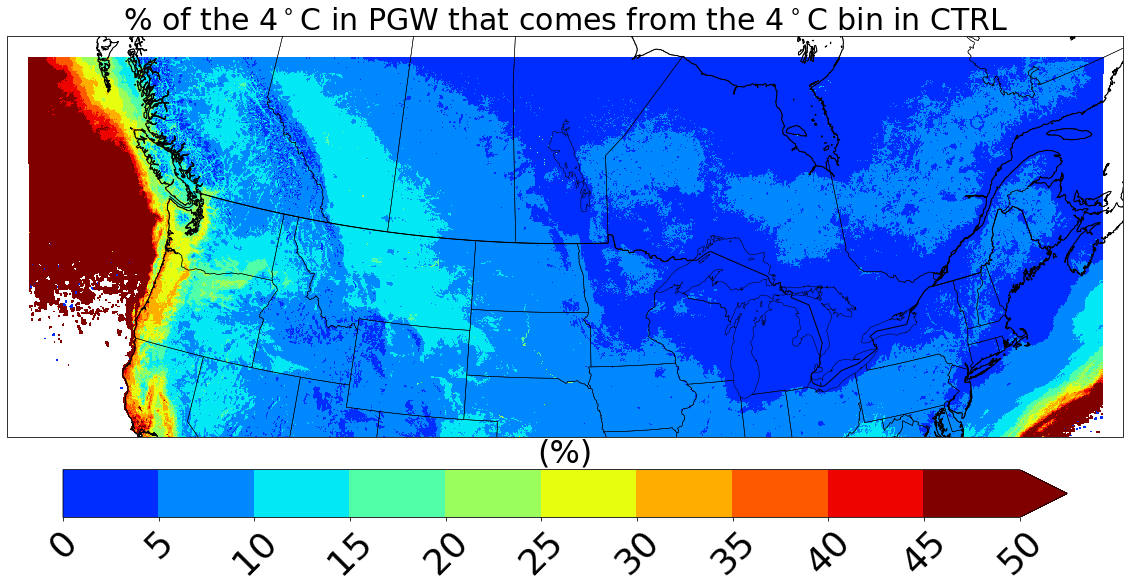

In [10]:
# How much of the PGW values at 4C come from: 4C in CTRL
# total_p4PGW_p4CTRL / total_pgw_plus4

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the 4${\rm ^\circ C}$ in PGW that comes from the 4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('p4PGW_p4CTRL.png', facecolor='white')
plt.show()

<ipython-input-12-69822a463884>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_n0CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
<ipython-input-12-69822a463884>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


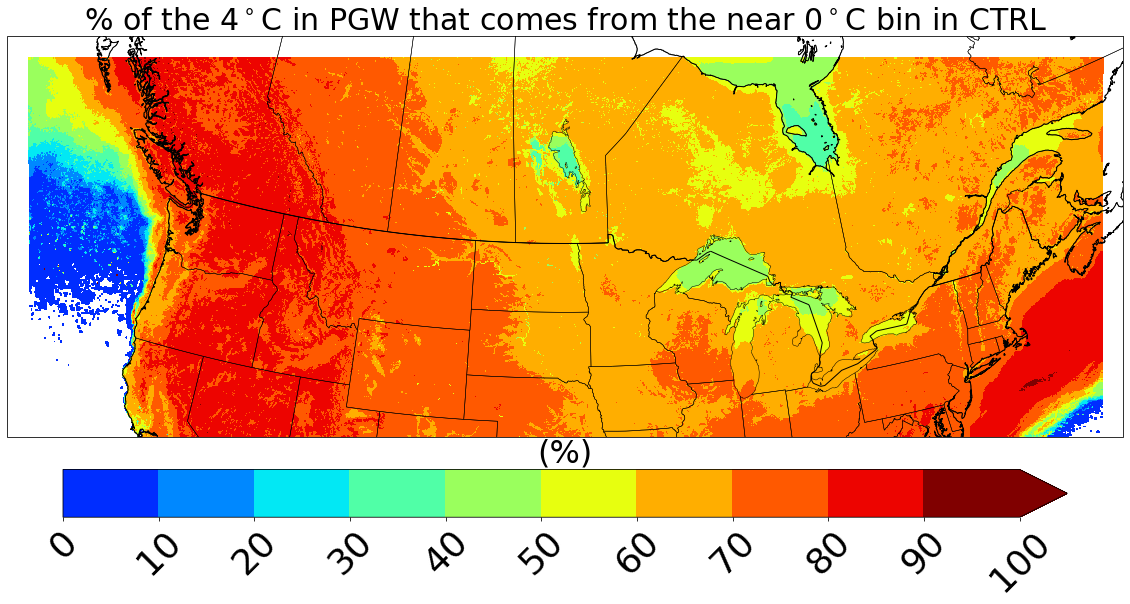

In [12]:
# How much of the PGW values at 4C come from: near 0 in CTRL
# total_p4PGW_n0CTRL / total_pgw_plus4

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the 4${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_n0CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('p4PGW_n0CTRL.png', facecolor='white')
plt.show()

<ipython-input-14-b9b88b19a6bf>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_m4CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
<ipython-input-14-b9b88b19a6bf>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


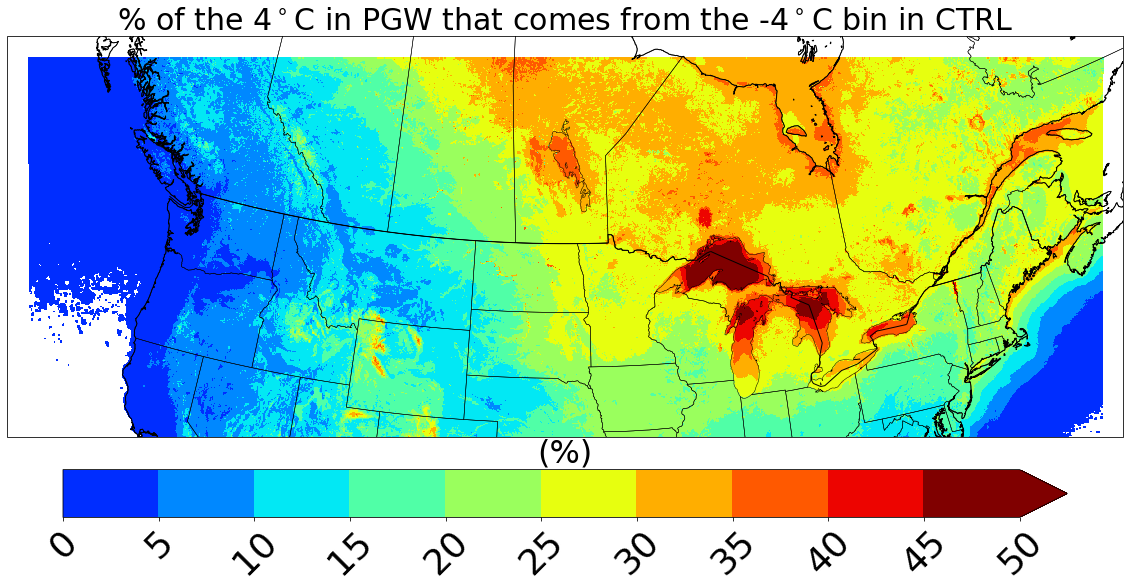

In [14]:
# How much of the PGW values at 4C come from: -4C in CTRL
# total_p4PGW_m4CTRL / total_pgw_plus4

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the 4${\rm ^\circ C}$ in PGW that comes from the -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_m4CTRL'].values*100/aux1['total_pgw_plus4'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('p4PGW_m4CTRL.png', facecolor='white')
plt.show()

In [ ]:
# Old stuff 